In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./36100412-eng/36100412.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3014 entries, 0 to 3013
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   REF_DATE                                    3014 non-null   object 
 1   GEO                                         3014 non-null   object 
 2   DGUID                                       3014 non-null   object 
 3   Canada's international investment position  3014 non-null   object 
 4   Geographic region                           3014 non-null   object 
 5   Currency                                    3014 non-null   object 
 6   UOM                                         3014 non-null   object 
 7   UOM_ID                                      3014 non-null   int64  
 8   SCALAR_FACTOR                               3014 non-null   object 
 9   SCALAR_ID                                   3014 non-null   int64  
 10  VECTOR      

In [3]:
df.drop(columns=["SYMBOL", "TERMINATED"], inplace=True)
#df.REF_DATE = pd.to_datetime(df.REF_DATE)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3014 entries, 0 to 3013
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   REF_DATE                                    3014 non-null   object 
 1   GEO                                         3014 non-null   object 
 2   DGUID                                       3014 non-null   object 
 3   Canada's international investment position  3014 non-null   object 
 4   Geographic region                           3014 non-null   object 
 5   Currency                                    3014 non-null   object 
 6   UOM                                         3014 non-null   object 
 7   UOM_ID                                      3014 non-null   int64  
 8   SCALAR_FACTOR                               3014 non-null   object 
 9   SCALAR_ID                                   3014 non-null   int64  
 10  VECTOR      

In [4]:
df.loc[~df.STATUS.isnull()][:]

,REF_DATE,GEO,DGUID,Canada's international investment position,Geographic region,Currency,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,DECIMALS
29,2015-01,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,0
173,2015-04,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,0
317,2015-07,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,0
461,2015-10,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,0
605,2016-01,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,0
749,2016-04,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,0
893,2016-07,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,0
1037,2016-10,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,0
1181,2017-01,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,0
1325,2017-04,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,0


In [5]:
df = df.loc[~df.VALUE.isnull()]
df.drop(columns="STATUS", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3003 entries, 0 to 3013
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   REF_DATE                                    3003 non-null   object 
 1   GEO                                         3003 non-null   object 
 2   DGUID                                       3003 non-null   object 
 3   Canada's international investment position  3003 non-null   object 
 4   Geographic region                           3003 non-null   object 
 5   Currency                                    3003 non-null   object 
 6   UOM                                         3003 non-null   object 
 7   UOM_ID                                      3003 non-null   int64  
 8   SCALAR_FACTOR                               3003 non-null   object 
 9   SCALAR_ID                                   3003 non-null   int64  
 10  VECTOR      

In [6]:
df.rename(columns={"Canada's international investment position":"CIIP"}, inplace=True)

In [7]:
df.nunique()

REF_DATE               21
GEO                     1
DGUID                   1
CIIP                   23
Geographic region       1
Currency                7
UOM                     1
UOM_ID                  1
SCALAR_FACTOR           1
SCALAR_ID               1
VECTOR                143
COORDINATE            143
VALUE                2716
DECIMALS                1
dtype: int64

In [8]:
df.CIIP.unique()

array(['Total assets', 'Direct investment assets',
       'Canadian portfolio investment',
       'Canadian portfolio investment, foreign debt securities',
       'Canadian portfolio investment, foreign equity and investment fund shares',
       'Official international reserves', 'Other Canadian investment',
       'Other Canadian investment, loans',
       'Other Canadian investment, currency and deposits',
       'Other Canadian investment, trade credits and advances',
       'Other Canadian investment, other accounts receivable',
       'Total liabilities', 'Direct investment liabilities',
       'Foreign portfolio investment',
       'Foreign portfolio investment, Canadian debt securities',
       'Foreign portfolio investment, Canadian equity and investment fund shares',
       'Other foreign investment', 'Other foreign investment, loans',
       'Other foreign investment, currency and deposits',
       'Other foreign investment, special drawing rights',
       'Other foreign inve

In [31]:
total_rows = ["Total assets", "Total liabilities"]
total_cols = ["REF_DATE", "CIIP", "VALUE", "Currency"]
total_df = df.loc[df.CIIP.isin(total_rows)][total_cols]
total_df = total_df.loc[total_df.Currency != "All currencies"]
total_df.set_index("REF_DATE", inplace=True)
total_df.head()

In [34]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2015-01 to 2020-01
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CIIP      252 non-null    object 
 1   VALUE     252 non-null    float64
 2   Currency  252 non-null    object 
dtypes: float64(1), object(2)
memory usage: 7.9+ KB


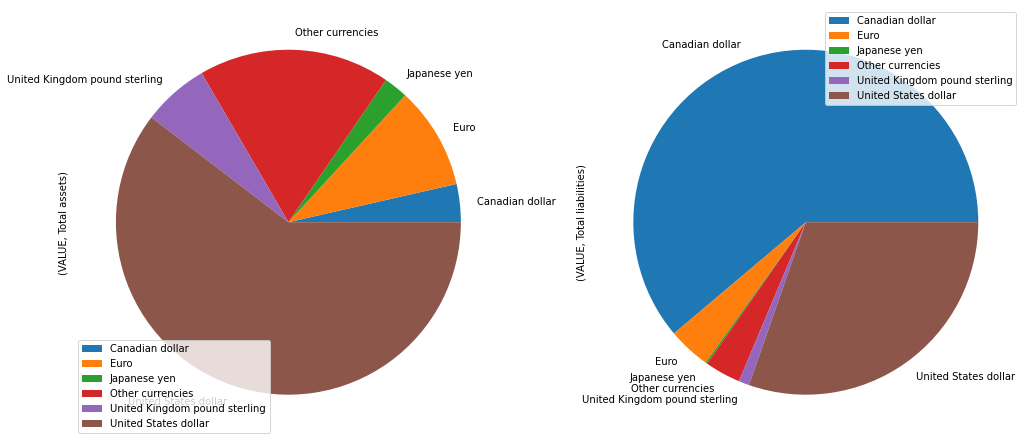

In [43]:
g1 = total_df.groupby(by=["CIIP", "Currency"]).mean().unstack("CIIP")
fig1 =g.plot.pie(subplots=True, figsize=(17, 17))

In [44]:
asset_rows = ["Direct investment assets", "Canadian portfolio investment", "Official international reserves", ...,
             "Other Canadian investment"]
asset_cols = ["REF_DATE", "CIIP", "VALUE", "Currency"]
asset_df = df.loc[df.CIIP.isin(asset_rows)][asset_cols]
asset_df = asset_df.loc[asset_df.Currency != "All currencies"]
asset_df.set_index("REF_DATE", inplace=True)
asset_df.head()

,CIIP,VALUE,Currency
REF_DATE,,,
2015-01,Direct investment assets,17233.0,Canadian dollar
2015-01,Direct investment assets,758364.0,United States dollar
2015-01,Direct investment assets,182770.0,Euro
2015-01,Direct investment assets,133762.0,United Kingdom pound sterling
2015-01,Direct investment assets,10224.0,Japanese yen


In [45]:
asset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 483 entries, 2015-01 to 2020-01
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CIIP      483 non-null    object 
 1   VALUE     483 non-null    float64
 2   Currency  483 non-null    object 
dtypes: float64(1), object(2)
memory usage: 15.1+ KB


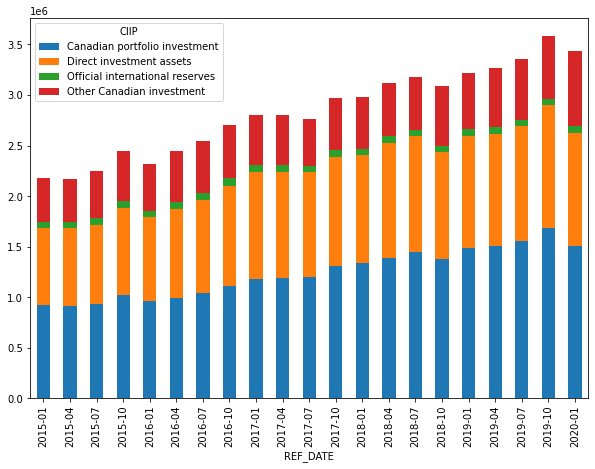

In [151]:
g2 = asset_df.loc[asset_df.Currency=="United States dollar"][:]
g2 = g2.groupby(by=[g2.index, "CIIP"]).sum().unstack("CIIP")
fig2 = g2.plot.bar(y="VALUE", stacked=True, figsize=(10, 7))

In [46]:
liab_rows = ["Direct investment liabilities", "Foreign portfolio investment", "Other foreign investment"]
liab_cols = ["REF_DATE", "CIIP", "VALUE", "Currency"]
liab_df = df.loc[df.CIIP.isin(liab_rows)][liab_cols]
liab_df = liab_df.loc[liab_df.Currency != "All currencies"]
liab_df.set_index("REF_DATE", inplace=True)
liab_df.head()

,CIIP,VALUE,Currency
REF_DATE,,,
2015-01,Direct investment liabilities,1141383.0,Canadian dollar
2015-01,Direct investment liabilities,51367.0,United States dollar
2015-01,Direct investment liabilities,35927.0,Other currencies
2015-01,Foreign portfolio investment,1030744.0,Canadian dollar
2015-01,Foreign portfolio investment,617187.0,United States dollar


In [47]:
liab_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315 entries, 2015-01 to 2020-01
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CIIP      315 non-null    object 
 1   VALUE     315 non-null    float64
 2   Currency  315 non-null    object 
dtypes: float64(1), object(2)
memory usage: 9.8+ KB


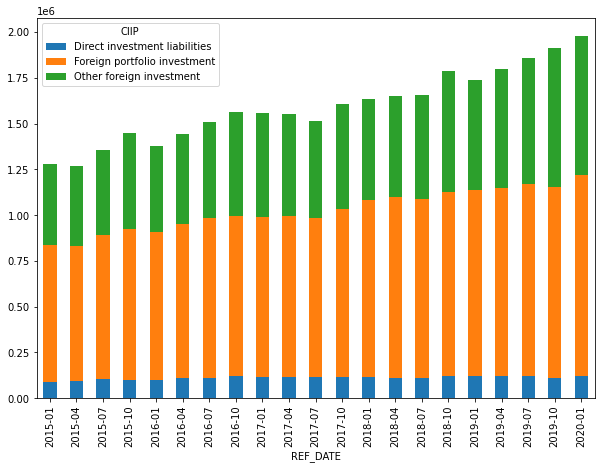

In [154]:
g3 = liab_df.loc[liab_df.Currency!="Canadian dollar"][:]
g3 = g3.groupby(by=[g3.index, "CIIP"]).sum().unstack("CIIP")
fig3 = g3.plot.bar(y="VALUE", stacked=True, figsize=(10, 7))

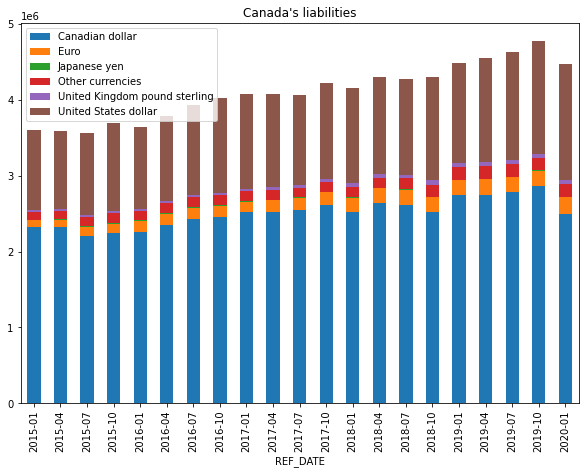

In [128]:
g4 = liab_df.groupby(by=[liab_df.index, "Currency"]).sum().unstack("Currency")
fig4 = g4.plot.bar(y="VALUE", stacked=True, figsize=(10, 7))
plt.legend(loc='upper left');
plt.title("Canada's liabilities");

In [139]:
g4.columns

MultiIndex([('VALUE',               'Canadian dollar'),
            ('VALUE',                          'Euro'),
            ('VALUE',                  'Japanese yen'),
            ('VALUE',              'Other currencies'),
            ('VALUE', 'United Kingdom pound sterling'),
            ('VALUE',          'United States dollar')],
           names=[None, 'Currency'])

In [143]:
g4.loc[:][('VALUE', 'Canadian dollar')]

REF_DATE
2015-01    2323460.0
2015-04    2324619.0
2015-07    2210650.0
2015-10    2240761.0
2016-01    2258621.0
2016-04    2351189.0
2016-07    2422674.0
2016-10    2460154.0
2017-01    2515185.0
2017-04    2517882.0
2017-07    2549649.0
2017-10    2615428.0
2018-01    2527114.0
2018-04    2644846.0
2018-07    2619181.0
2018-10    2517673.0
2019-01    2744962.0
2019-04    2749209.0
2019-07    2780756.0
2019-10    2864167.0
2020-01    2493874.0
Name: (VALUE, Canadian dollar), dtype: float64

In [142]:
g4.loc[:]["VALUE"].columns

Index(['Canadian dollar', 'Euro', 'Japanese yen', 'Other currencies',
       'United Kingdom pound sterling', 'United States dollar'],
      dtype='object', name='Currency')